Introduction

The telecommunication industry is one of the fastest growing industries as consumer communication needs increase and diversify and as new technologies emerge. The telecommunications landscape is therefore quickly evolving to meet these needs to and to integrate the new emerging technologies such as cloud computing, decentralized telecom networks, virtualized network services and artificial technologies amongst others. 

Consequently, service providers are increasingly assessing its capacities and its customer base in order optimize profits and reduce losses. In this regard, SyriaTel intends to predict customer churn to reduce losses that are associated with customer churn.  Customer churn refers to the loss of customers or subscribers for various reasons. Telecommunication companies amongst other business therefore measure and track churn as a percentage of customers lost vis-a-vis the total number of customers subscribing to their services over a given period of time.


Problem Statement

Customer churning is one of the main killers of business growth. Therefore there is need to undertake an assessment of SyriaTel to predict customer churning and put in place interventions to mitigate against it to reduce losses incurred from churning, identify customers who are at risk of churning and take proactive steps to retain them, stabilize their market value and optimize profits.

Objective(s)

The main objective of this is to build a classification model that can predict whether or not a customer will churn.

To achieve the said main objective, the project will focus on the following specific objectives-

(i) Conduct exploratory data analysis of the dataset;

(ii)Fit various classification algorithm models to determine the one that can provide the best churn predictions;

(iii) Make predictions using the best prediction model; and

(iv) Check the accuracy of the predicted variables

1. Data Understanding

In [1011]:
#Data manipulation
import pandas as pd 
import numpy as np

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#Modelling
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn import tree
from imblearn.over_sampling import SMOTE, SMOTENC

#Algorithms for supervised learning methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV


#Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [906]:
#Data loading & viewing of afew rows

df = pd.read_csv("customer-churning.csv")
df.head

<bound method NDFrame.head of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes       

In [907]:
#Overview of the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [908]:
#numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [909]:
#categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['state', 'phone number', 'international plan', 'voice mail plan']


In [910]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [911]:
#General statistics of the numeric columns

df.describe().transpose()

count        mean        std     min     25%     50%  \
account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
total night charge      3333.0    9.039325   2.275873    1.04    7.52    9.05   
total intl minutes      3333.0   10.237294   2.791840    0.00    8.50   10.30   
total intl calls        3333.0    4.479448   2.461214    0.00    3.00    4.00   
total intl charge       3333.0    2.764581   0.753773    0.00    2.30    2.78   
customer service calls  3333.0    1.562856   1.315491    0.00    1.00    1.00   

                           75%     max  
account length          127.00  243.00  
area code               510.00  510.00  
number vmail messages    20.00   51.00  
total day minutes       216.40  350.80  
total day calls         114.00  165.00  
total day charge         36.79   59.64  
total eve minutes       235.30  363.70  
total eve calls         114.00  170.00  
total eve charge         20.00   30.91  
total night minutes     235.30  395.00  
total night calls       113.00  175.00  
total night charge       10.59   17.77  
total intl minutes       12.10   20.00  
total intl calls          6.00   20.00  
total intl charge         3.27    5.40  
customer service calls    2.00    9.00

2. Data Cleaning & Exploration

In [912]:
#Check for missing values

df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [913]:
#Check duplicated data

df.duplicated().sum()

0

In [914]:
#Drop the phone number column

df = df.drop("phone number", axis=1)

In [915]:
#convert area code datatype

df["area code"] = df["area code"].astype(object)

3. Data Analysis

3.1 Univariate data analysis

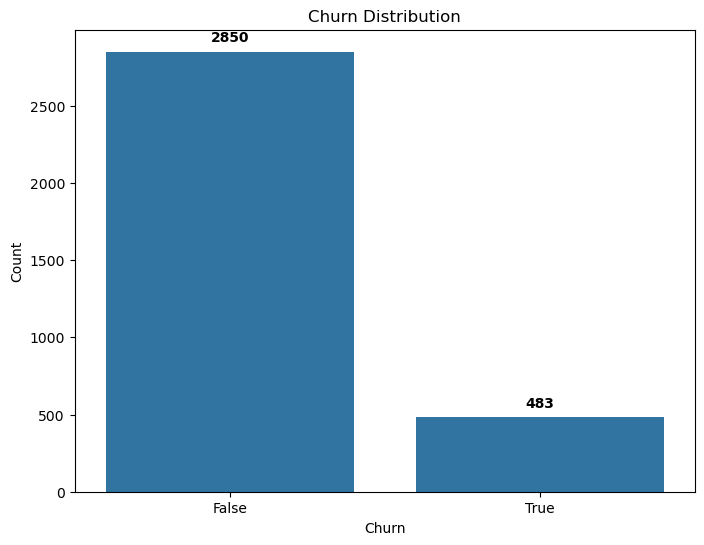

In [916]:
#Distribution of churn

class_counts = df.groupby("churn").size()
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x="churn")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        fontsize=10, color='black', fontweight='bold',
        xytext=(0, 10),
        textcoords='offset points')

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


Out of the 3,333 customers, 483 terminated their contracts, which is equivalent to 14.5% of customers lost. 

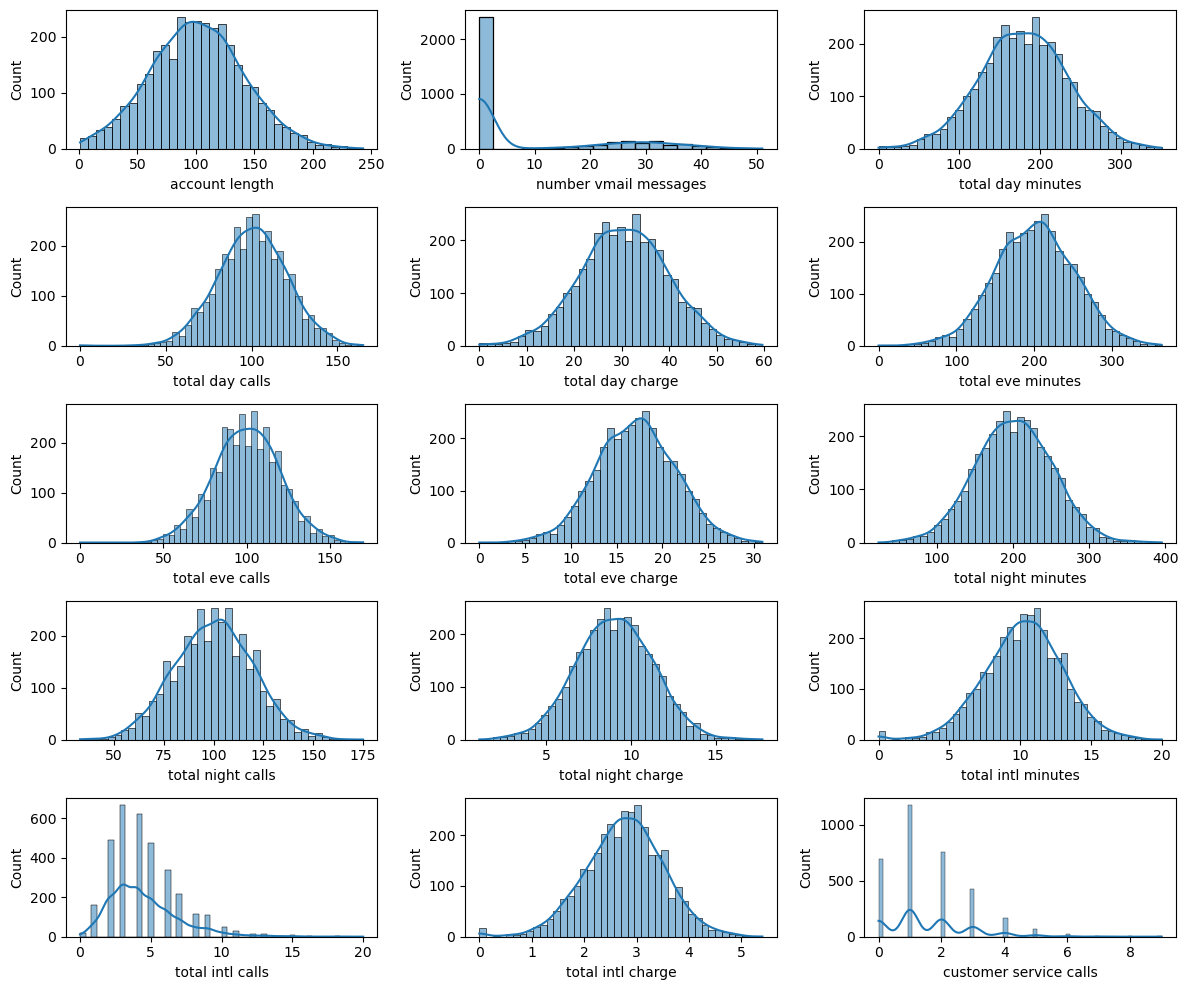

In [917]:
#Distrbution of the numerical features

numerical_columns =['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

numerical_columns = df[numerical_columns].select_dtypes(include=['number']).columns.tolist()

nrows = (len(numerical_columns) - 1) // 3 + 1
ncols = min(3, len(numerical_columns))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,10))

axes = axes.flatten() if nrows > 1 else [axes]

for i, feature in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

if len(numerical_columns) < nrows * ncols:
    for i in range(len(numerical_columns), nrows * ncols):
        fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

In [918]:
def plot_categorical_distribution(df, feature):
    """
    Plots the categorical feature distribution and adds data labels on top of each bar.
    """
    plt.figure(figsize=(14,5))
    ax = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)

    for p in ax.patches:

        ax.annotate(f'{p.get_height():.0f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            fontsize=10, color='black', fontweight='bold',
            xytext=(0,10),
            textcoords='offset points')

    plt.xticks(rotation=90)
    plt.show()

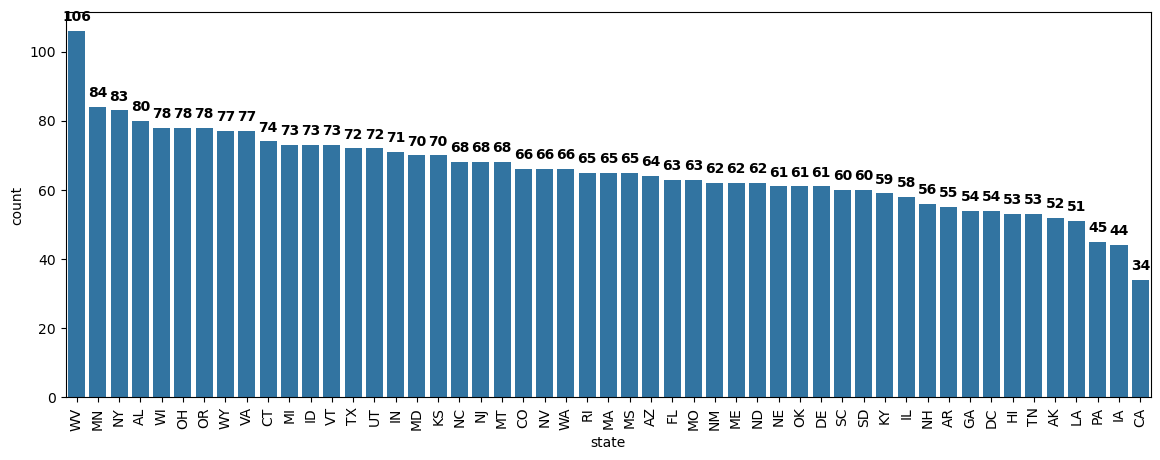

In [919]:
# Distribution of customers across states

plot_categorical_distribution(df, 'state')

In [920]:
df['state'].value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

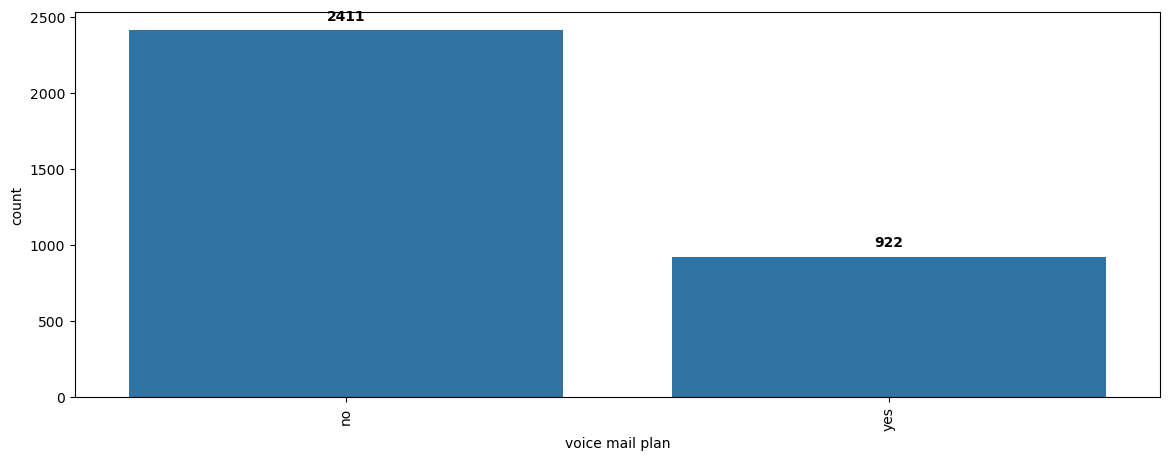

In [921]:
plot_categorical_distribution(df, 'voice mail plan')

In [922]:
df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

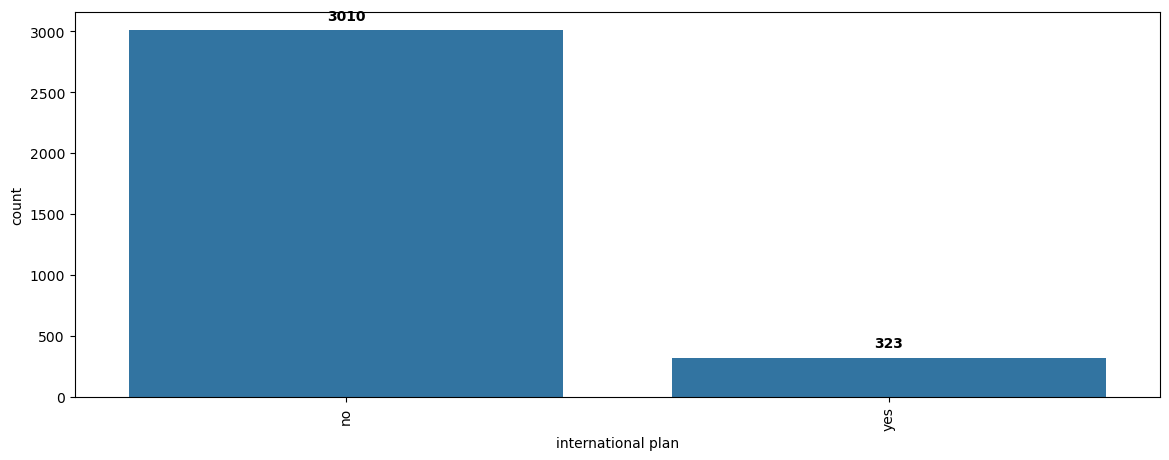

In [923]:
plot_categorical_distribution(df, 'international plan')

In [924]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

3.2 Bivariate data analysis

In [925]:
#Distribution of categorical features against customer churn

def plot_categorical_distribution(df, feature):
    """
    Plots distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(14,8))
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_8_categories = churn_counts.head(8).index.tolist()
    sns.countplot(x=feature, hue="churn", data=df, order=top_8_categories)
    plt.show()

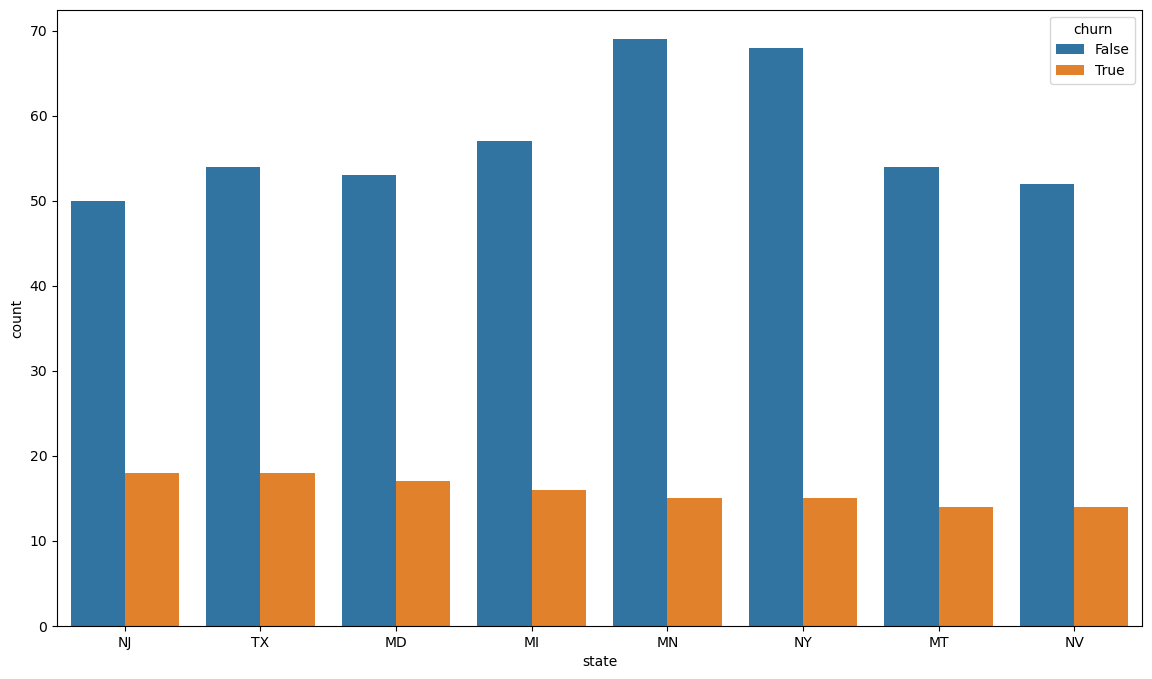

In [926]:
plot_categorical_distribution(df, 'state')

Texas and New Jersey had the most customers who churned.

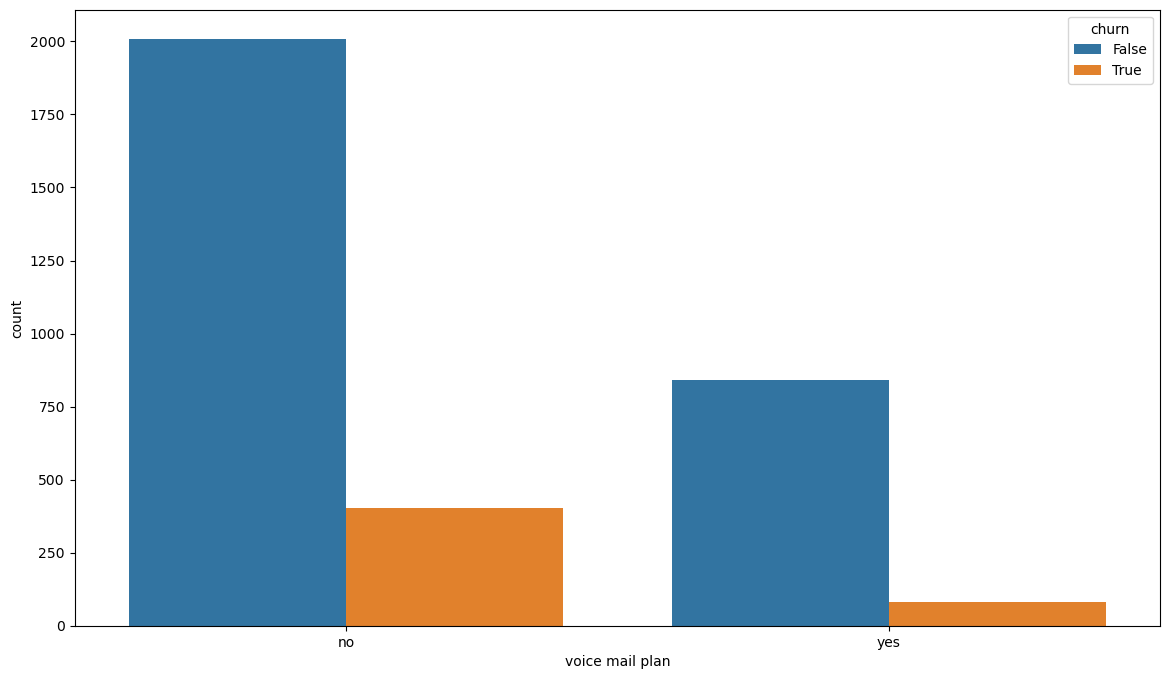

In [927]:
plot_categorical_distribution(df, 'voice mail plan')

Majority of the customers who churned did not have a voice mail plan

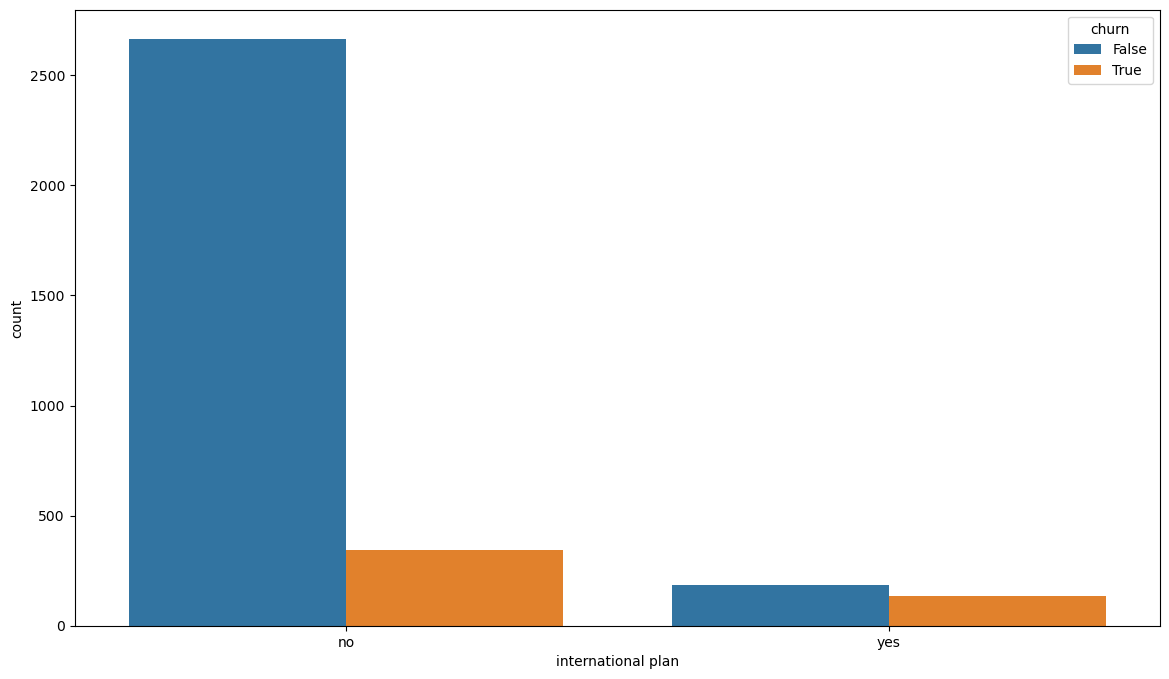

In [928]:
plot_categorical_distribution(df, 'international plan')

Majority of the customers who churned did not have an international plan

In [929]:
#Rate of customer churn against charges

def plot_churn_kde(df, x_column, charge_type):
    """
    Plot features based on churn rate
    """
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=df, x=x_column, hue="churn", fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Count')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

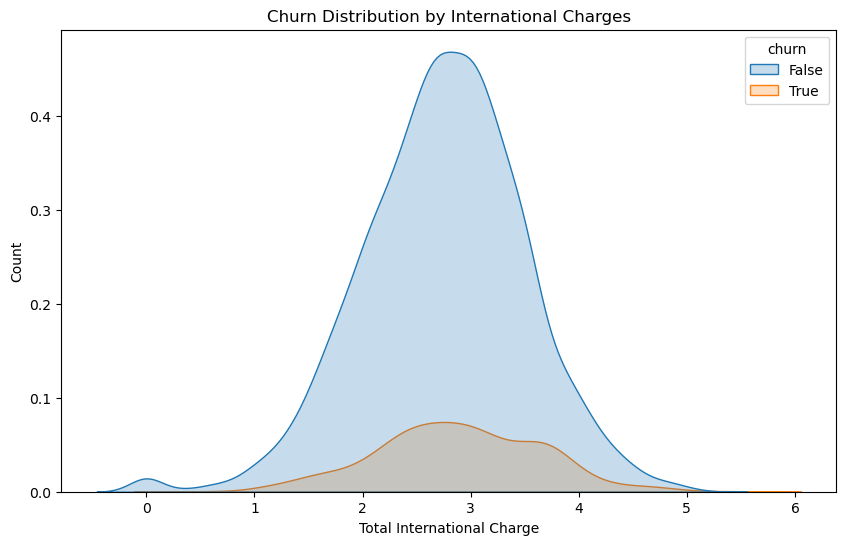

In [930]:
# Churn vis-a-vis international charges

plot_churn_kde(df, 'total intl charge', 'International')

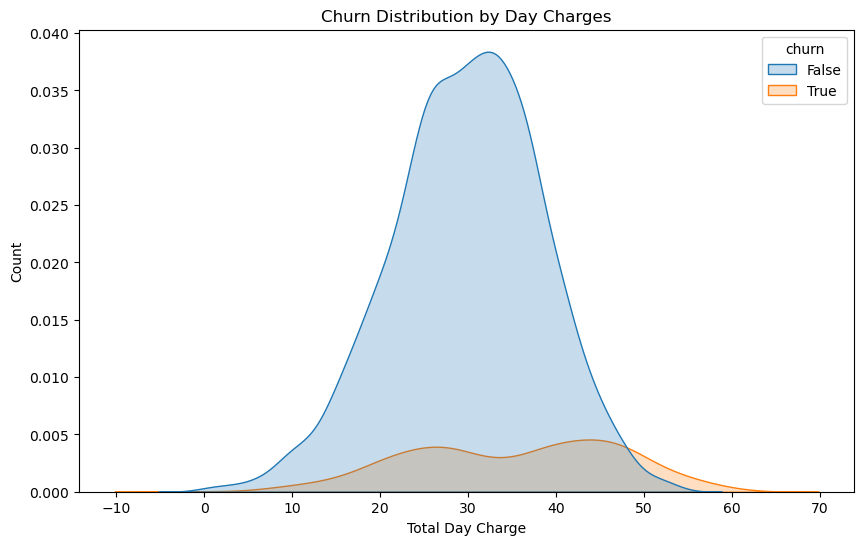

In [931]:
plot_churn_kde(df, 'total day charge', 'Day')

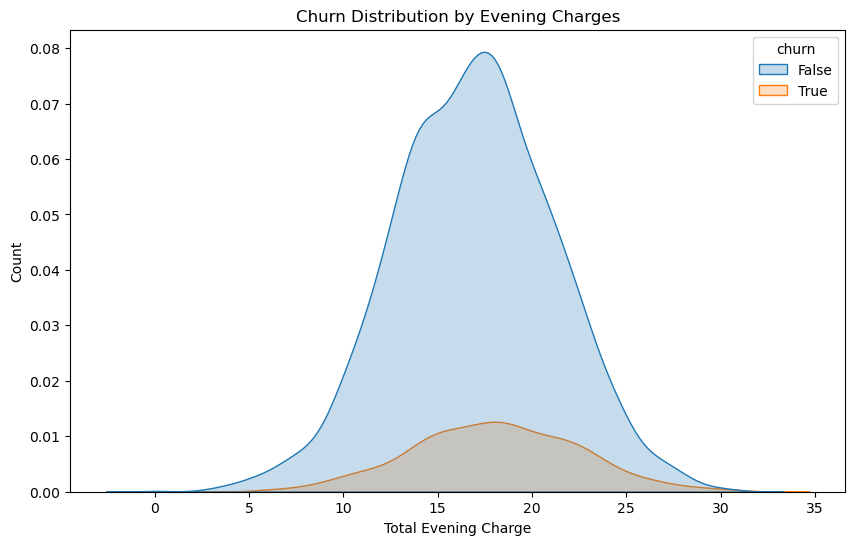

In [932]:
plot_churn_kde(df, 'total eve charge', 'Evening')

3.3 Outliers

In [933]:
def drop_numerical_outliers(df, z_thresh=3):
    numerical_columns = df.select_dtypes(include=[np.number])
    z_scores = numerical_columns.apply(zscore)

    mask = (np.abs(z_scores) < z_thresh).all(axis=1)

    df = df[mask]
    
    return df

df = drop_numerical_outliers(data)
print(df.shape)

(3124, 71)


3.3 Correlations

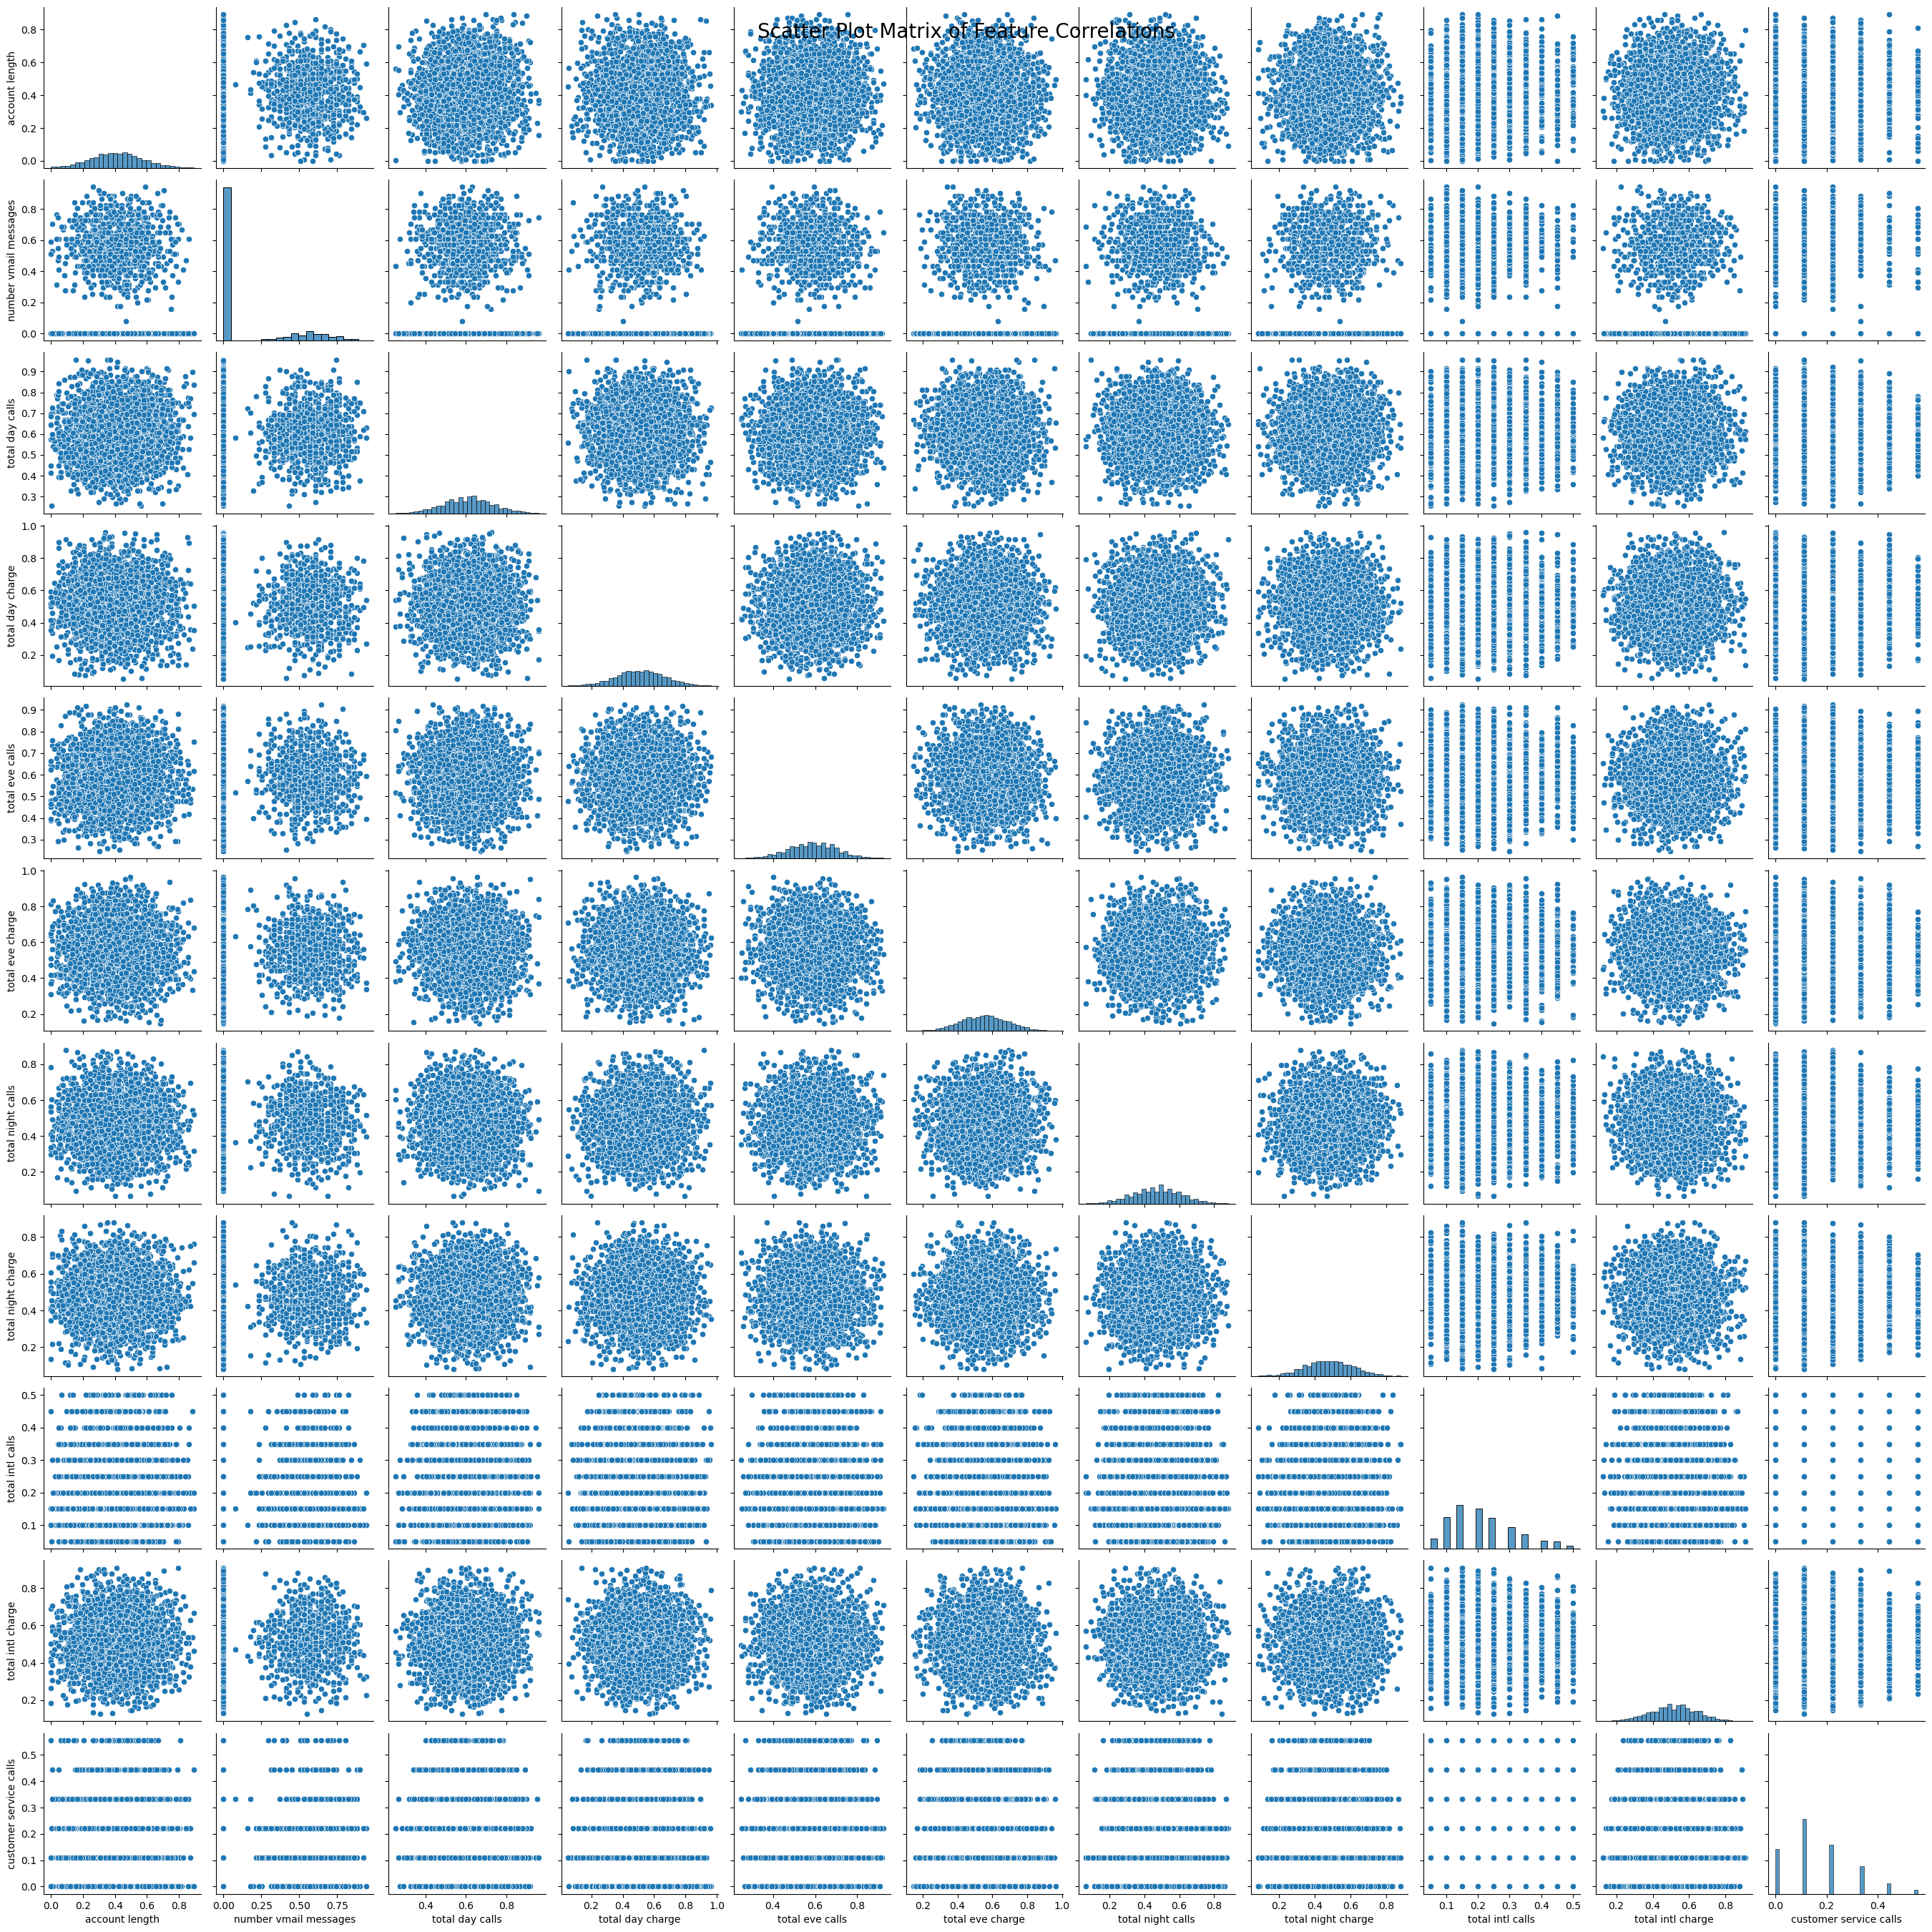

In [934]:
numeric_df = df.select_dtypes(include=['number'])
sns.pairplot(numeric_df)

plt.suptitle('Scatter Plot Matrix of Feature Correlations', size=20)
plt.show()

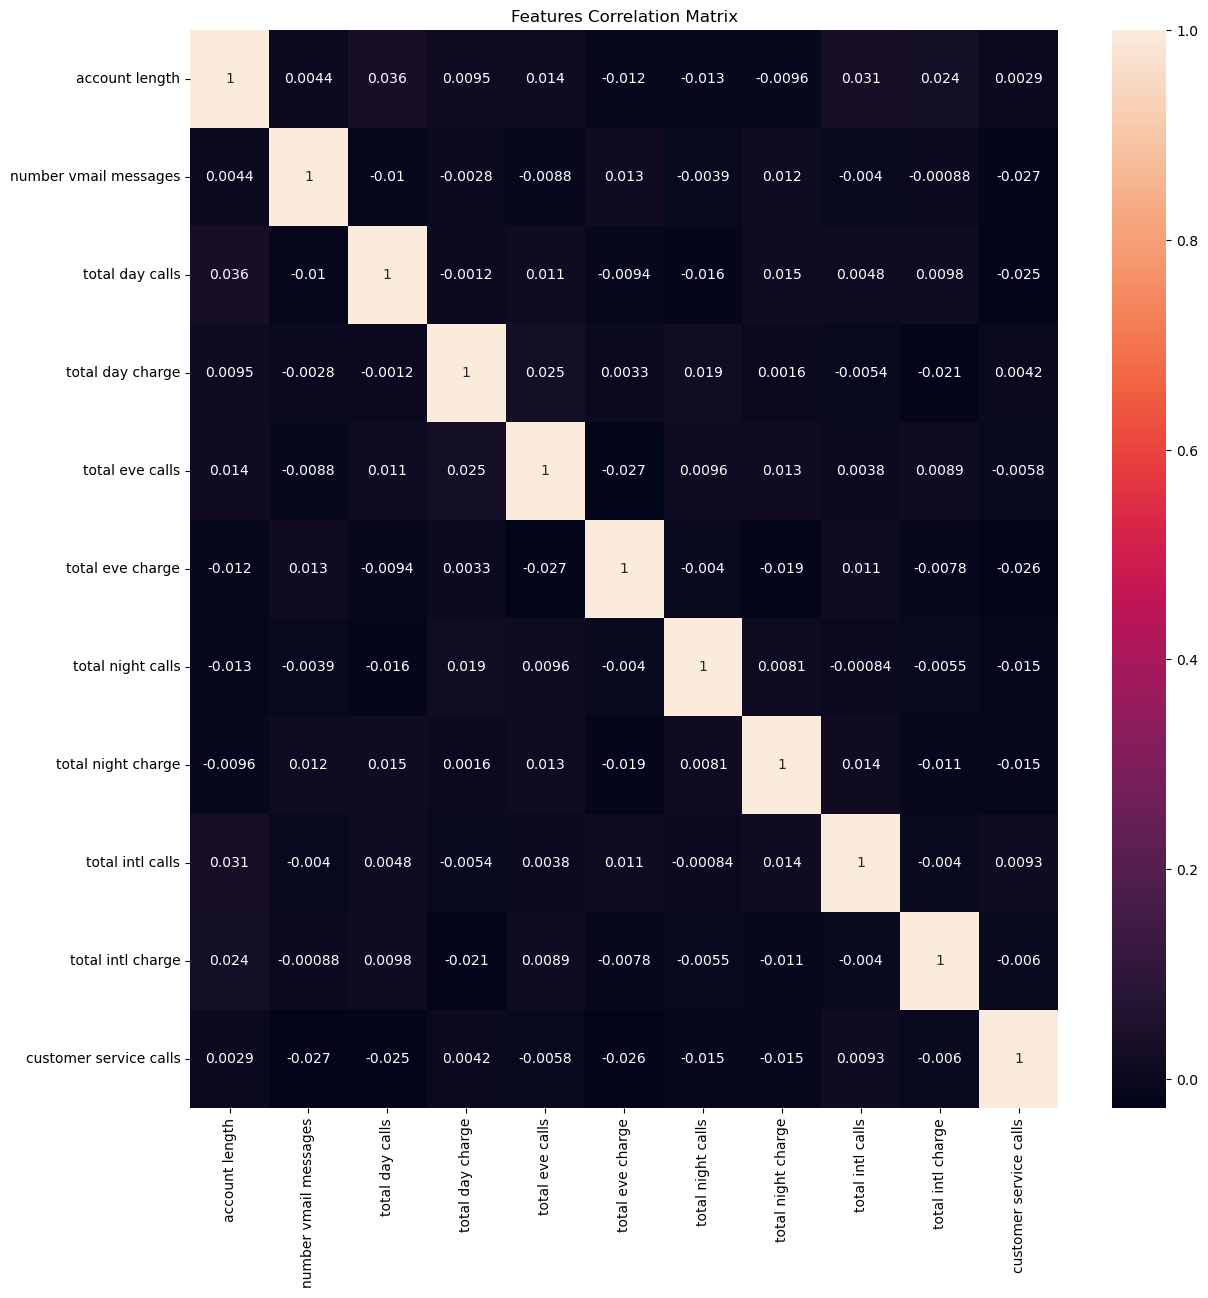

In [935]:
#Correlation between features using a heatmap

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, ax=ax)
plt.title('Features Correlation Matrix')
plt.show()

In [936]:
#calculate correlation matrix

corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

df = df.drop(to_drop, axis=1)

In [ ]:
#reloading the original dataset that was transformed due to running a one hot code

df = pd.read_csv("customer-churning copy.csv")

In [ ]:
#label coding

label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

In [948]:
#scaling data

scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(data[columns].values.reshape(-1,1))

for i in data.select_dtypes(include=[np.number]).columns:
    data[i] = scaling(i)
    
df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [955]:
df = df.drop(["state", "area code"], axis=1)

4. MODELLING

In this section i will use logistic regression, decision tree and random forest algorithms to predict customer churn based on the dataset availed. I will evaluate the performance of the model on a recall score of 80% or higher whereupon it will be considered a success.

In [956]:
y=df['churn']
X=df.drop('churn', axis=1)

In [957]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [958]:
smote=SMOTENC(categorical_features = [1,2], random_state= 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train, y_train)

In [ ]:
#define x and y then split the data into train and test sets using a test size of 0.25

X = df.drop("churn", axis=1)
y = df["churn"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

4.1 Logistic regression

In [959]:
logreg = LogisticRegression(random_state=123)

In [963]:
label_encoder = LabelEncoder()

resampled_X_train['international plan'] = label_encoder.fit_transform(resampled_X_train['international plan'])
resampled_X_train['voice mail plan'] = label_encoder.fit_transform(resampled_X_train['voice mail plan'])

X_test['international plan'] = label_encoder.fit_transform(X_test['international plan'])
X_test['voice mail plan'] = label_encoder.fit_transform(X_test['voice mail plan'])

logreg.fit(resampled_X_train, resampled_y_train)

y_pred_log = logreg.predict(X_test)

In [976]:
def plt_confusion_matrix(y_true, y_pred, classes):
    """
    Confusion matrix plot
    """ 
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=classes, yticklabels=classes, cbar=False)

    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion Matrix')
    plt.show()

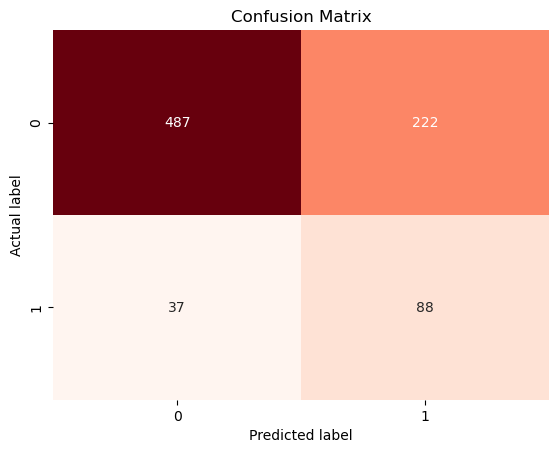

In [977]:
plt_confusion_matrix(y_test, y_pred_log, [0,1])

In [978]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79       709
           1       0.28      0.70      0.40       125

    accuracy                           0.69       834
   macro avg       0.61      0.70      0.60       834
weighted avg       0.83      0.69      0.73       834



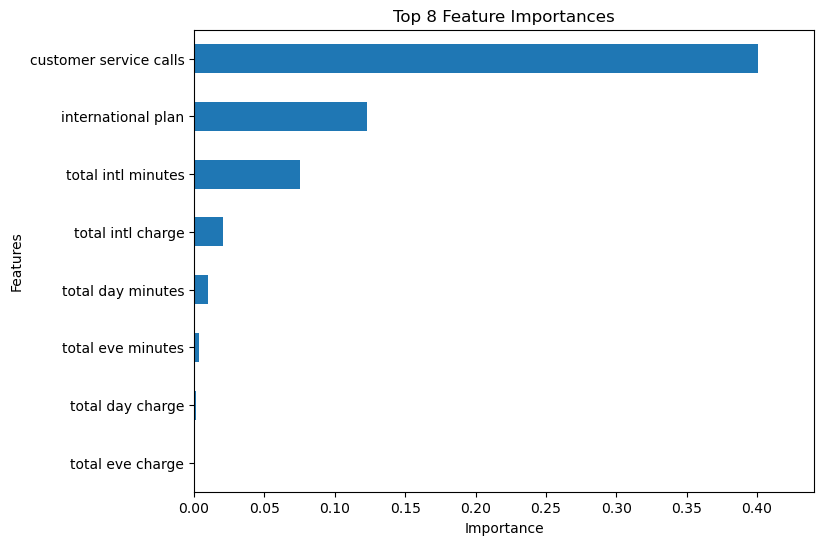

In [980]:
#Features importance

importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
top_features = feature_importances[:8]
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 8 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)
plt.show()

The logistic regression has a recall value of 0.70, which is a good baseline model. Meaning that the model can identify atleast 70% of the actual positive instances accurately.

As illustrated, customer service calls is the most important feature.

4.2 Decision Tree Classifier

In [981]:
dt_clf = DecisionTreeClassifier(random_state=123)

In [982]:
dt_clf.fit(resampled_X_train,resampled_y_train)

y_pred_dt = dt_clf.predict(X_test)

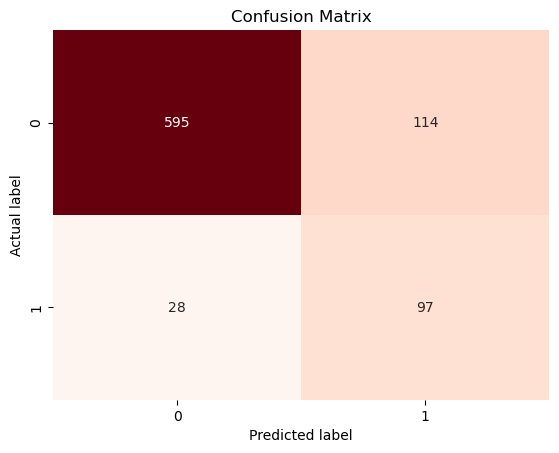

In [983]:
plt_confusion_matrix(y_test, y_pred_dt, [0,1])

In [984]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       709
           1       0.46      0.78      0.58       125

    accuracy                           0.83       834
   macro avg       0.71      0.81      0.74       834
weighted avg       0.88      0.83      0.85       834



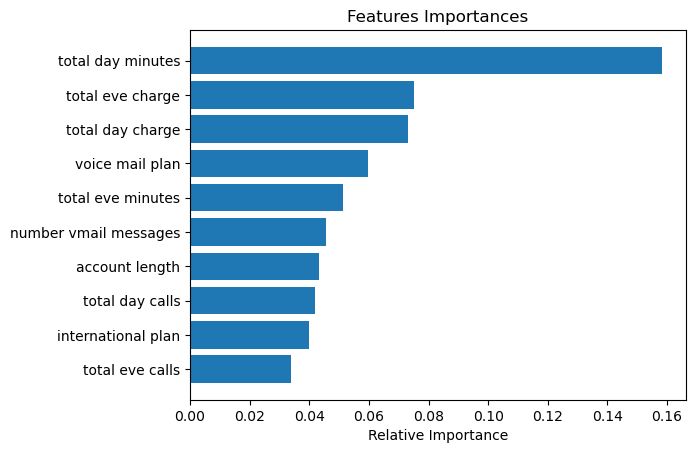

In [ ]:
#Features Importances

feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure()
plt.title('Features Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The decision tree model has a recall score of 0.78, meaning that it can identify 78% of the actual positives instances accurately. Further meaning that its making predictions accurately more than inaccurately. 
Total day minutes is the most important feature.

4.3 Random Forest Classifier

In [989]:
rf_clf = RandomForestClassifier(random_state=123)

rf_clf.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(random_state=123)

In [990]:
y_pred_rf = rf_clf.predict(X_test)

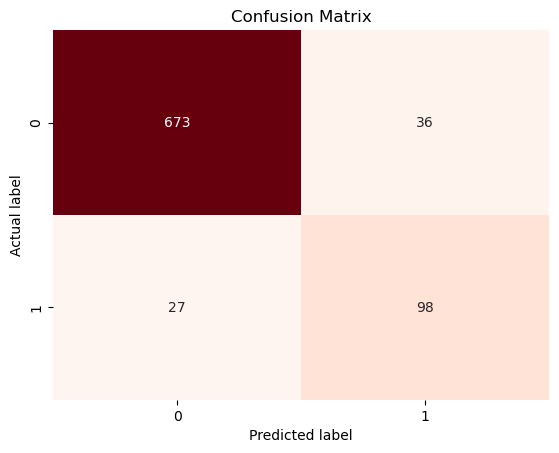

In [991]:
plt_confusion_matrix(y_test, y_pred_rf, [0,1])

In [992]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       709
           1       0.73      0.78      0.76       125

    accuracy                           0.92       834
   macro avg       0.85      0.87      0.86       834
weighted avg       0.93      0.92      0.93       834



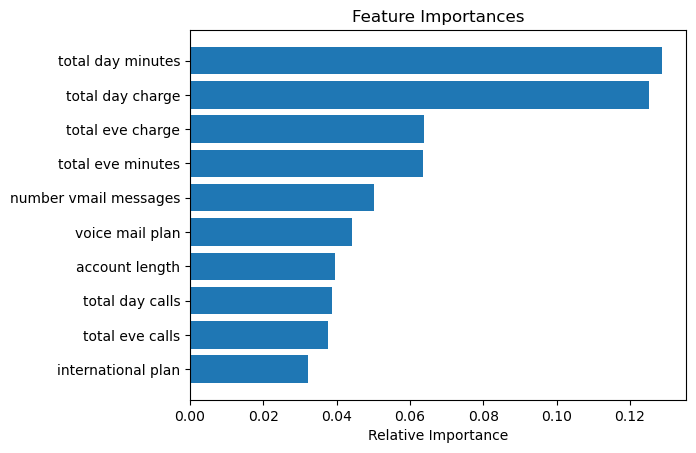

In [996]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier model has a recall score of 0.78 which is similar to the decision tree classifier model, meaning that both models can accurately identify the positive accurances by 78%.
According to the model, total day minutes if the most important feature.

5. Model Evaluation

In this section, i will evaluate the models based on the recall score and the ROC_AUC, whereupon i will use the best model to tune it for better performance.

5.1 Model comparison vis-a-vis the recall score

In [ ]:
np.random.seed(123)

classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier()]

result_table = pd.DataFrame(columns=['classifiers', 'recall'])

for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)

    recall = recall_score(y_test, y_pred)

    result_df = pd.DataFrame({'classifiers' : [cls.__class__.__name__], 'recall' : [recall]})
    result_table = pd.concat([result_table, result_df], ignore_index=True)

result_table.set_index('classifiers', inplace=True)
result_table

recall
classifiers                   
LogisticRegression       0.704
DecisionTreeClassifier   0.776
RandomForestClassifier   0.784

5.2 Model comparison vis-a-vis ROC curve

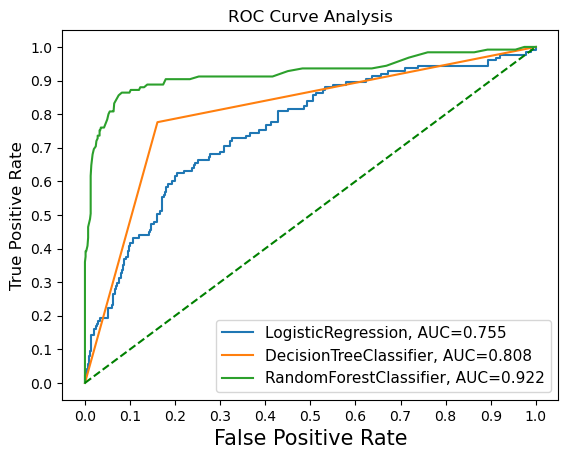

In [1009]:
np.random.seed(123)
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _  = roc_curve(y_test, yproba)

    auc = roc_auc_score(y_test, yproba)

    result_df = pd.DataFrame({'classifiers': [cls.__class__.__name__], 'fpr' : [fpr], 'tpr' : [tpr], 'auc' : [auc]})
    result_table = pd.concat([result_table, result_df], ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure()

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'], label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='green', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=12)

plt.title('ROC Curve Analysis', fontsize=12)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()


The ROC curve analysis shows that the RandomForestClassifier has the best performance of 0.922 followed by the DecisionTreeClassifier with 0.808 and the last is the LogisticRegression with 0.755.

5.3 Model tuning

Based on the recall scores and ROC AUC, the RandomForestClassifier has the most promising performance. To improve its performance, the model can be tuned using GridSearch.

In [1015]:
param_grid = {
    "max_depth": [8,15,20],
    "n_estimators":[500,1000],
    "min_samples_split":[5,10,15],
    "criterion":['entropy', 'gini']
}

rf = RandomForestClassifier(random_state = 123)
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

grid_search.fit(resampled_X_train,resampled_y_train)

print(grid_search.best_params_)

0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}


In [1016]:
rf_tuned = RandomForestClassifier(criterion= 'entropy',
                                  max_depth = 20,
                                  min_samples_split = 5,
                                  n_estimators = 1000,
                                  random_state = 123)

rf_tuned.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=123)

In [1017]:
y_pred_tuned = rf_tuned.predict(X_test)

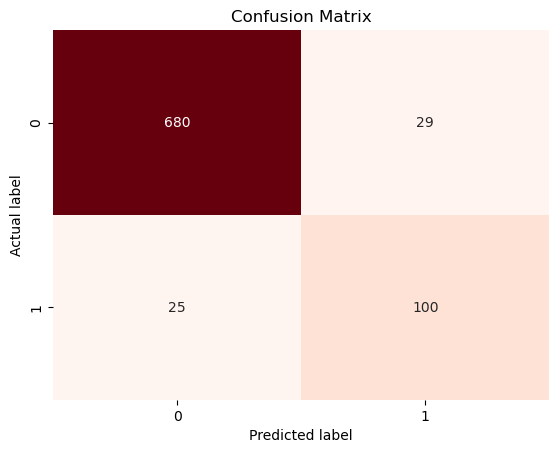

In [1019]:
plt_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [1020]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       709
           1       0.78      0.80      0.79       125

    accuracy                           0.94       834
   macro avg       0.87      0.88      0.87       834
weighted avg       0.94      0.94      0.94       834



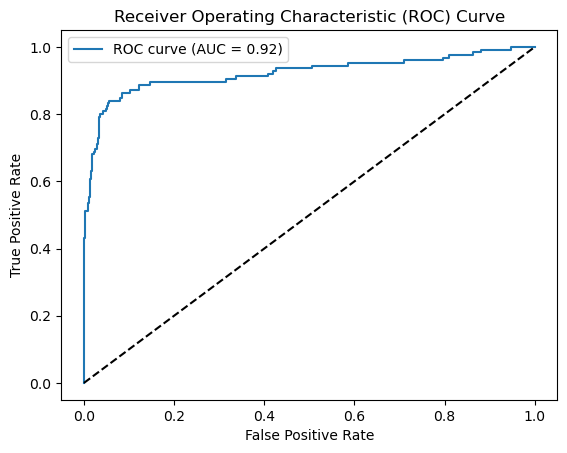

In [1021]:
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc_score = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2F})'.format(auc_score))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

According to the ROC curve, the tuned RandomForestClassifier performs very well in distinguishing between the positive and negative classes that is both churned and non-charned customers. 